# 1D Search Algorithms

## 7.3

$$
f(x) = 8e^{1-x} + 7 \ln x
$$

1. 绘制函数 $f(x)$ 在闭区间 $[1, 2]$ 上随 $x$ 变化的曲线，并验证 $f(x)$ 在给定区间上的确是单峰的。

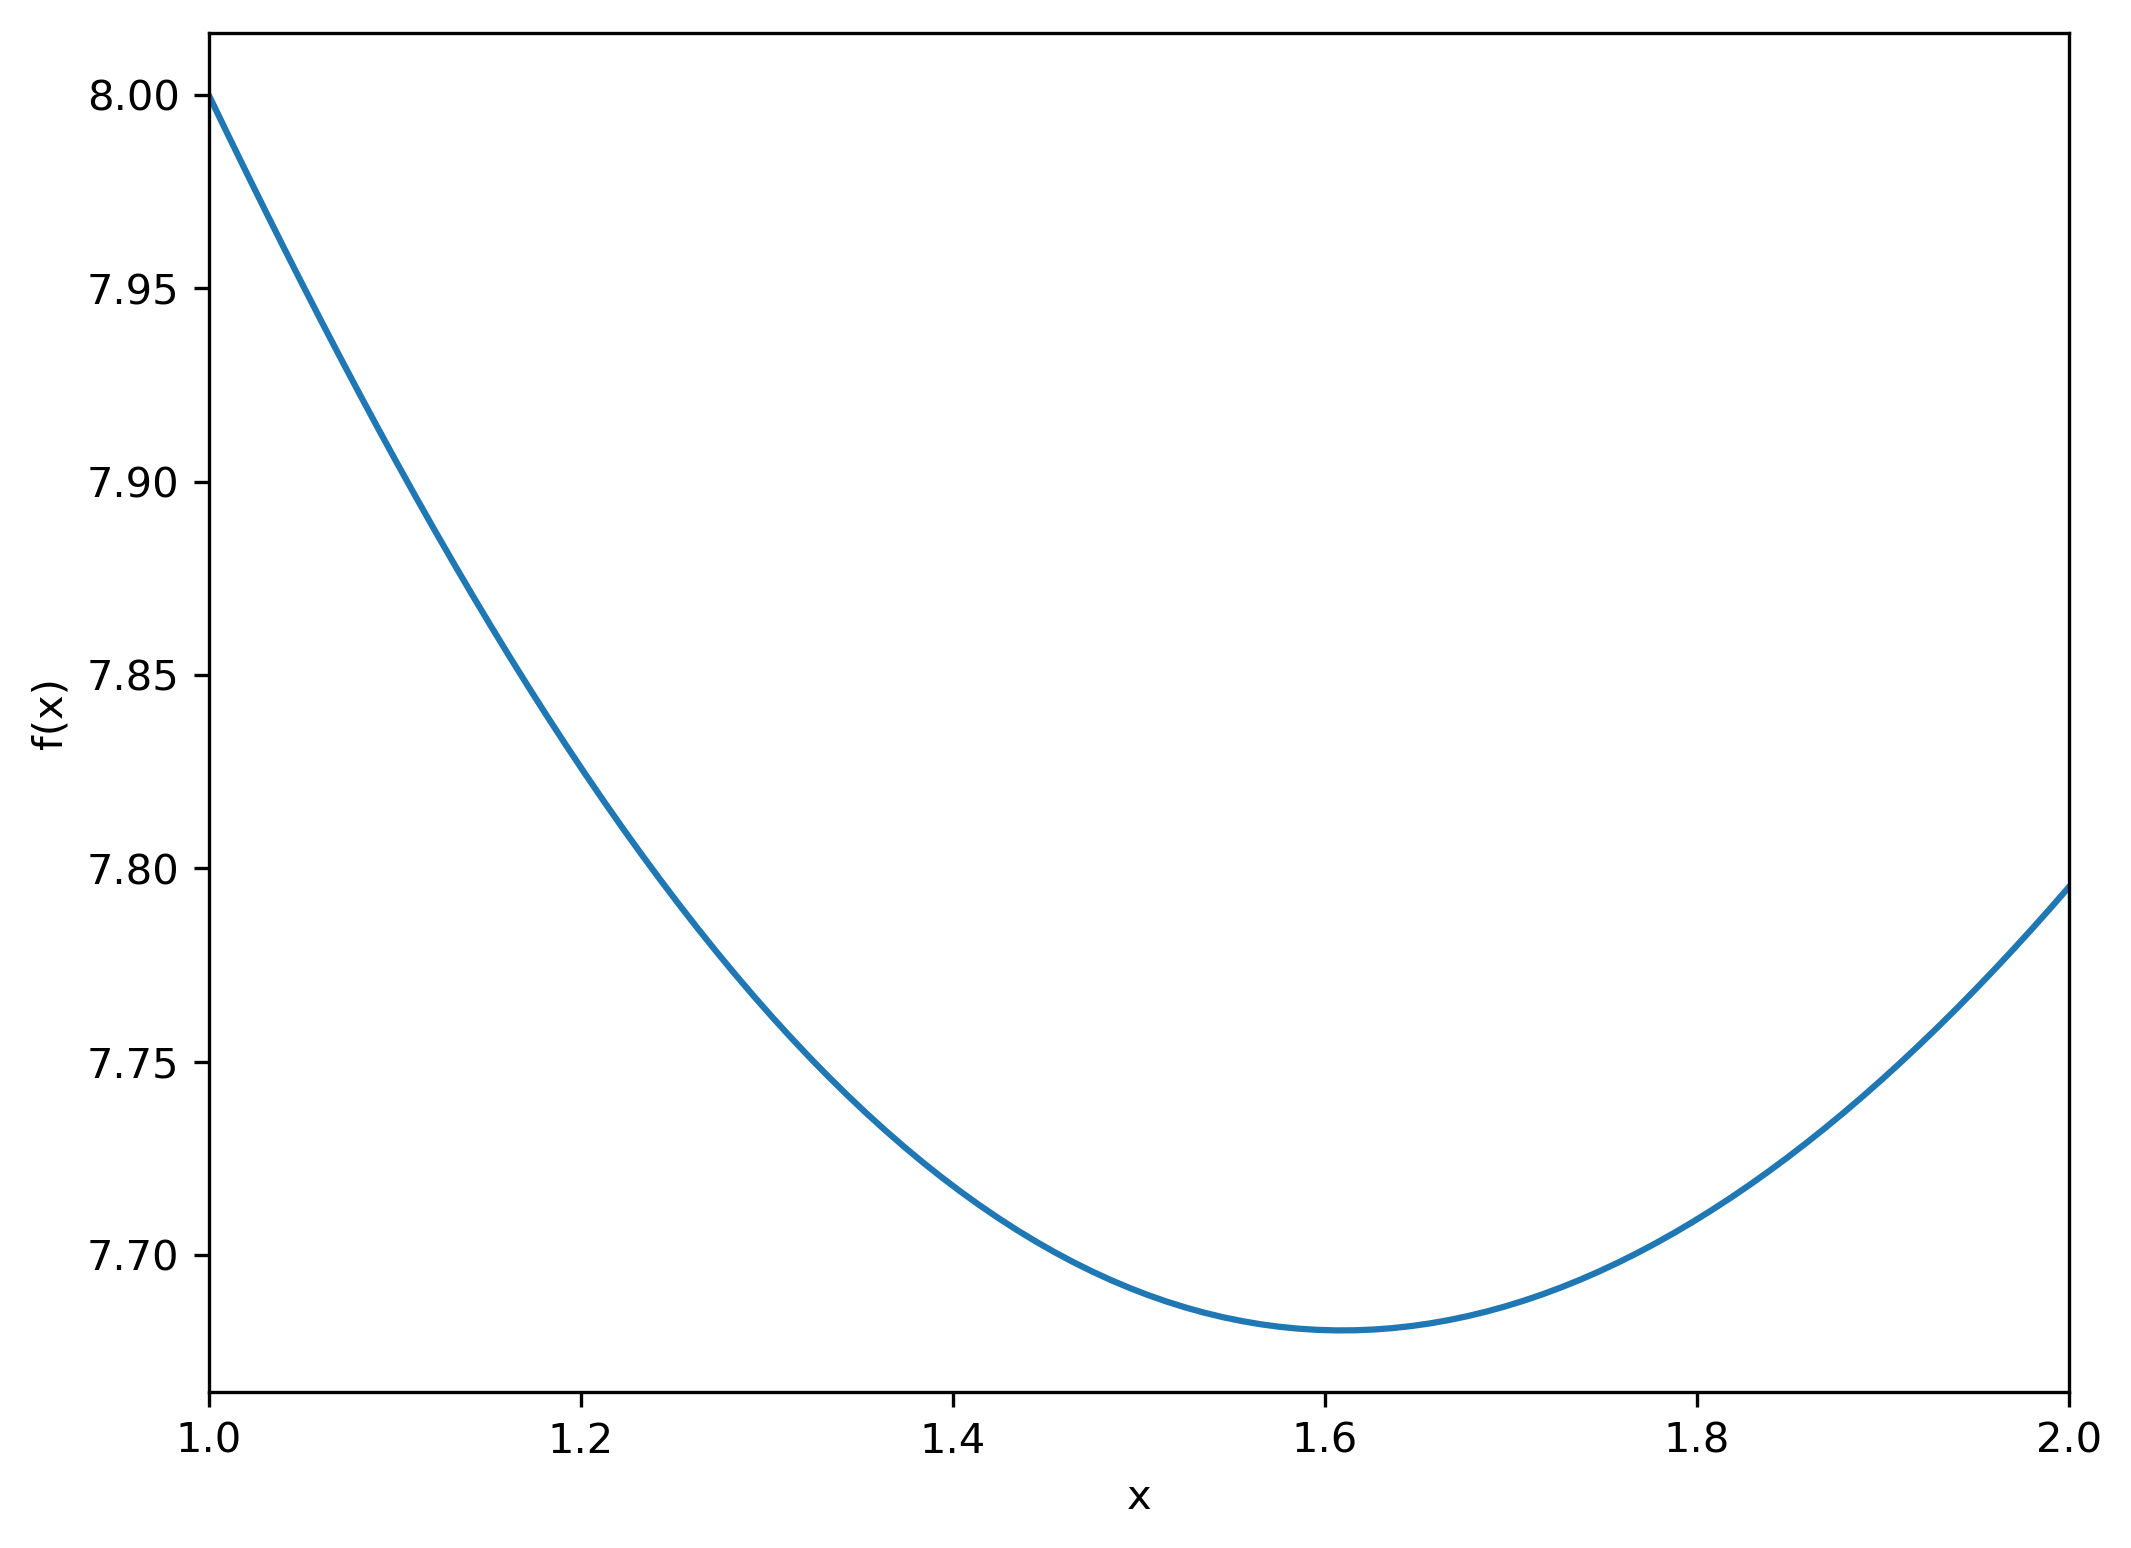

In [12]:
from math import log,e
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 8*e**(1-x) + 7*log(x)
x = np.linspace(1,2,100)
y = list(map(f,x))

fig,ax = plt.subplots(figsize=(8,6),dpi=300)
ax.plot(x,y)
ax.set_xlim([1,2])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
plt.show()

2. 编写程序，利用黄金分割法，将函数的极小点压缩在 0.23 的长度区间内，列出所有的中间结果。

In [13]:
from math import sqrt,log

def GoldenSectionSearch(func, start, end, precision):
    rho = (3-sqrt(5))/2
    a,b = [start],[end]
    ak = start + rho * (end - start)
    bk = end - rho * (end - start)
    fak = func(ak)
    fbk = func(bk)
    while (end - start > precision):
        if (fak <= fbk):
            end = bk
            bk,fbk = ak,fak
            ak = start + rho * (end - start)
            fak = func(ak)
        else:
            start = ak
            ak, fak = bk, fbk
            bk = end - rho * (end - start)
            fbk = func(bk)
        a.append(start)
        b.append(end)
    return (a,b)

def PrintNumTab(*args,precision=3):
    s=f'| %.{precision}g'
    for a in args:
        print('————————'*len(a)+'—')
        for i in a:
            print(s%i,end='\t')
        print('|')
    print('————————'*len(a)+'—')

PrintNumTab(*GoldenSectionSearch(f,1,2,0.23))

—————————————————————————————————————————
| 1	| 1.38	| 1.38	| 1.53	| 1.53	|
—————————————————————————————————————————
| 2	| 2	| 1.76	| 1.76	| 1.67	|
—————————————————————————————————————————


3. 重复问题 2，将黄金分割法替换为斐波那契数列法，$\varepsilon = 0.05$，用表格列出所有结果。

In [14]:
def FibonacciSearch(func, start, end, precision, epsilon):
    x,y = 1,1
    a,b = [start],[end]
    while (precision*y<(end-start)):
        temp = x
        x = y
        y = temp+y

    ak = (x*start+(y-x)*end)/y
    bk = (x*end+(y-x)*start)/y
    fak = func(ak)
    fbk = func(bk)

    while (y>2):
        if (fak <= fbk):
            end = bk
            bk,fbk = ak,fak
            ak = (x*start+(y-x)*end)/y
            fak = func(ak)
        else:
            start = ak
            ak, fak = bk, fbk
            bk = (x*end+(y-x)*start)/y
            fbk = func(bk)
        a.append(start)
        b.append(end)
        temp = x
        x = y - x
        y = temp
    
    if (y==2):
        ak = (start+end)/2 - epsilon*(end-start)
        bk = (start+end)/2 + epsilon*(end-start)
        if (func(ak) <= func(bk)):
            a.append(start)
            b.append(bk)
        else:
            a.append(ak)
            b.append(end)
    return (a,b)

PrintNumTab(*FibonacciSearch(f,1,2,0.23,0.05))

—————————————————————————————————
| 1	| 1.4	| 1.4	| 1.56	|
—————————————————————————————————
| 2	| 2	| 1.76	| 1.76	|
—————————————————————————————————


## 7.10

1. 编写程序，利用割线法求解方程 $g(x) = 0$，迭代的停止规则为
   $$
   |x^{(k+1)} - x^{(k)}| < |x^{(k)}| \varepsilon
   $$
   $\varepsilon$ 为给定正常数。

In [15]:
def SecantMethod(f, x1, x2, precision):
    def GetNullPoint(f, x1, x2):
        return (f(x2)*x1-f(x1)*x2)/(f(x2)-f(x1))
    PointLog = [x1, x2]
    while (abs(x2-x1)>precision*abs(x1)):
        temp = x2
        x2 = GetNullPoint(f, x1, x2)
        x1 = temp
        PointLog.append(x2)
    return PointLog

2. 利用割线法解方程，并求出结果对应的函数值。参数：$x^{(-1)} = 0, x^{(0)} = 1, \epsilon = 10^{-5}$

$$
g(x) = (2x-1)^{2} + 4(4-1024x)^{4}
$$

In [17]:
g = lambda x: (2*x-1)**2 + 4*(4-1024*x)**4 - 2
x = SecantMethod(g, 0, 1, 1e-5)
x0 = x[-1]
print("x0=%.5g,g(x0)=%.5g"%(x0, g(x0)))

x0=0.0032135,g(x0)=3.5557e-07
